![](assets/deputeHonoreMercier.jpg)
# Mon corrigé

C'est avec plaisir que je partage avec vous le corrigé du devoir3 sur l'analyse des subventions octroyées par mon ministère ces dernières années. <hr>

Il fallait commencer par importer ```pandas```. Je peux le rebaptiser avec le nom que je veux.<br>
C'est généralement plus brillant de le changer en un nom plus court.<br>
Mais je ne sais pas pourquoi, j'aime bien le nom que j'ai choisi ici&nbsp;:

In [1]:
import pandas as pablo

J'aime la science. Rassurez-vous!<br>
Mais j'aime moins la notation scientifique de 💩 qui vient par défaut dans ```pandas```.<br>
Par bonheur, il est possible de la changer en jouant dans les options d'affichage de la manière suivante&nbsp;:

In [2]:
pablo.options.display.float_format = "{:.2f}".format

On importe ensuite le fichier de toutes les subventions octroyées par le fédéral.<br>
On prend soin d'ajouter l'option ```low_memory=False```, nécessaire avec un fichier de cette taille (_**228 Mo**_!).

In [3]:
subv = pablo.read_csv("grants.csv", low_memory=False)

### On pouvait également le lire directement à la source... mais c'est beaucoup plus long puisque le fichier est, comme je le disais, «un poco gordito»!
# subv = pablo.read_csv("https://open.canada.ca/data/dataset/432527ab-7aac-45b5-81d6-7597107a7013/resource/1d15a62f-5656-49ad-8c88-f40ce689d831/download/grants.csv")

Je vous demandais d'abord d'enlever les colonnes manifestement en anglais.<br>
Voyons voir ce qu'on a pour le moment comme colonnes.<br>J'ajoute ```len(subv.columns)``` pour les compter.

In [4]:
subv.columns, len(subv.columns)

(Index(['ref_number', 'amendment_number', 'amendment_date', 'agreement_type',
        'recipient_type', 'recipient_business_number', 'recipient_legal_name',
        'recipient_operating_name', 'research_organization_name',
        'recipient_country', 'recipient_province', 'recipient_city',
        'recipient_postal_code', 'federal_riding_name_en',
        'federal_riding_name_fr', 'federal_riding_number', 'prog_name_en',
        'prog_name_fr', 'prog_purpose_en', 'prog_purpose_fr',
        'agreement_title_en', 'agreement_title_fr', 'agreement_number',
        'agreement_value', 'foreign_currency_type', 'foreign_currency_value',
        'agreement_start_date', 'agreement_end_date', 'coverage',
        'description_en', 'description_fr', 'naics_identifier',
        'expected_results_en', 'expected_results_fr',
        'additional_information_en', 'additional_information_fr', 'owner_org',
        'owner_org_title'],
       dtype='object'), 38)

**Ayoye!** 38 colonnes!<br>
Retranchons celles qui se terminent par *«&nbsp;_en&nbsp;»*.

In [5]:
subv = subv.drop(["federal_riding_name_en","prog_name_en","prog_purpose_en","agreement_title_en","description_en","expected_results_en","additional_information_en"],1)

Ça ne nous donne plus que 31 colonnes. Excellent!

In [6]:
subv.columns, len(subv.columns)

(Index(['ref_number', 'amendment_number', 'amendment_date', 'agreement_type',
        'recipient_type', 'recipient_business_number', 'recipient_legal_name',
        'recipient_operating_name', 'research_organization_name',
        'recipient_country', 'recipient_province', 'recipient_city',
        'recipient_postal_code', 'federal_riding_name_fr',
        'federal_riding_number', 'prog_name_fr', 'prog_purpose_fr',
        'agreement_title_fr', 'agreement_number', 'agreement_value',
        'foreign_currency_type', 'foreign_currency_value',
        'agreement_start_date', 'agreement_end_date', 'coverage',
        'description_fr', 'naics_identifier', 'expected_results_fr',
        'additional_information_fr', 'owner_org', 'owner_org_title'],
       dtype='object'), 31)

Francisons-les, maintenant.

In [7]:
subv.columns = ['num', 'numAmendement', 'dateAmendement', 'typeSubv',
        'beneficiaireType', 'beneficiaireNumEntr', 'beneficiaireNomLegal',
        'beneficiaireNom', 'nomOrgRecherche',
        'pays', 'province', 'ville',
        'codePostal', 'circ',
        'circNum', 'programme', 'programmeBut',
        'titre', 'numContrat', 'valeur',
        'deviseEtr', 'deviseEtr_valeur',
        'dateContratDebut', 'dateContratFin', 'couverture',
        'description', 'naics', 'resultatsAttendus',
        'infoAdditionnelle', 'ministereAbr', 'ministere']

Est-ce que ç'a fonctionné?<br>
Effectuons un regroupement dans une colonne, pour vérifier.

In [8]:
subv.ministere.value_counts()

Employment and Social Development Canada | Emploi et Développement social Canada                                                    58483
Canadian Heritage | Patrimoine canadien                                                                                             48726
Natural Sciences and Engineering Research Council of Canada | Conseil de recherches en sciences naturelles et en génie du Canada    26276
National Research Council Canada | Conseil national de recherches Canada                                                            24403
Canadian Institutes of Health Research | Instituts de recherche en santé du Canada                                                  15959
Canada Economic Development for Quebec Regions | Développement économique Canada pour les régions du Québec                          8973
Indigenous and Northern Affairs Canada | Affaires autochtones et du Nord Canada                                                      8527
Social Sciences and Humanities Res

Merveilleux! Mon ministère apparaît au 2<sup>e</sup> rang pour le nombre de subventions octroyées.<br>
Nous allons y revenir.

Pour l'instant, concentrons-nous sur une opération que je vous demandais de faire&nbsp;: transformer la valeur des subventions en un nombre que ```pandas``` est en mesure de traiter.<br>Voyons d'abord ce que contient la colonne qui contient ces valeurs.

In [9]:
subv.valeur

0            $567,786.00
1             $39,240.00
2            $761,657.00
3            $259,174.00
4            $312,693.00
5          $1,129,294.00
6            $288,197.00
7            $461,816.00
8            $559,325.00
9            $389,687.00
10            $50,000.00
11         $2,138,500.00
12           $376,500.00
13            $69,500.00
14           $971,000.00
15         $3,366,500.00
16           $365,291.00
17           $300,500.00
18            $48,750.00
19            $91,931.00
20         $1,811,229.00
21         $6,937,485.00
22         $1,943,727.00
23           $600,000.00
24            $26,582.00
25           $158,310.00
26           $124,604.00
27         $1,533,275.00
28         $1,097,131.00
29            $74,874.00
               ...      
228934        $10,000.00
228935        $10,000.00
228936       $558,000.00
228937     $1,600,000.00
228938     $5,000,000.00
228939        $15,500.00
228940     $1,650,000.00
228941        $30,000.00
228942       $558,000.00


Si je demande la somme de cette colonne, j'obtiens un monstre de 228&nbsp;964 montants les uns à la suite des autres, une longue chaîne de plus de deux millions de caractères.

In [10]:
subv.valeur.sum()

'$567,786.00$39,240.00$761,657.00$259,174.00$312,693.00$1,129,294.00$288,197.00$461,816.00$559,325.00$389,687.00$50,000.00$2,138,500.00$376,500.00$69,500.00$971,000.00$3,366,500.00$365,291.00$300,500.00$48,750.00$91,931.00$1,811,229.00$6,937,485.00$1,943,727.00$600,000.00$26,582.00$158,310.00$124,604.00$1,533,275.00$1,097,131.00$74,874.00$60,000.00$384,900.00$64,551.00$98,235.00$205,500.00$118,795.00$141,200.00$123,150.00$427,333.00$29,480.00$2,472,127.00$46,938.00$44,200.00$50,000.00$48,885.00$34,060.00$42,000.00$210,970.00$4,500,000.00$154,221.00$140,777.00$27,300.00$4,400,000.00$909,325.00$58,807.00$94,360.00$50,000.00$49,452.00$25,000.00$6,905,431.00$50,000.00$1,170,866.00$34,416.00$50,000.00$1,600,272.00$60,000.00$48,200.00$30,257.00$38,800.00$25,895.00$27,100.00$32,800.00$47,410.00$41,175.00$30,712.00$45,188.00$1,048,761.00$49,999.00$40,950.00$40,000.00$464,304.00$128,500.00$202,410.00$884,475.00$499,814.00$62,292.00$142,100.00$102,000.00$75,000.00$63,825.00$65,050.00$173,800.00$

Il faut donc transformer le contenu de la colonne *valeur* en un nombre.

Pour y arriver, deux stratégies sont possibles&nbsp;:

- On peut utiliser la méthode ```.astype()``` (avec l'argument "float") sur la colonne qu'on souhaite transformer.
- On peut aussi appliquer la méthode ```to_numeric()``` 

Je sais que le prof ne vous les a pas montrées en classe. Mais il m'a confié que c'était parce qu'à cette étape-ci de la session, il avait très confiance en votre capacité de trouver vous-mêmes les solutions à vos problèmes de programmation.

Commençons par la première façon.

In [11]:
subv.valeur = subv.valeur.astype("float")

ValueError: could not convert string to float: '$3,465,792.00'

Diantre! Une erreur.<br>
```Pandas``` nous dit&nbsp;:

```ValueError: could not convert string to float: '$3,465,792.00'```

C'est-à-dire qu'il ne peut pas convertir cette chaîne de caractères en un nombre.

Le même chose se produira-t-elle avec l'autre façon?

In [12]:
subv.valeur = pablo.to_numeric(subv.valeur)

ValueError: Unable to parse string "$567,786.00" at position 0

Quelque chose de semblable se produit ici&nbsp;:

```Unable to parse string "$567,786.00"```

```Pandas``` est incapable d'analyser ce qu'il considère être une *string*, une chaîne de caractères.

Il faut donc faire quelques petites opérations pour nettoyer nos données. Il suffit de retrancher deux caractères qui bousillent tout&nbsp;: le ```$``` et la virgule qui sépare les milliers.<br>
On va s'y prendre en utilisant la fonction ```str.replace```.<br>
En fait deux fonction qu'on va enchaîner l'une à la suite de l'autre.

In [13]:
subv.valeur = subv.valeur.str.replace("$","").str.replace(",","")
subv.valeur

0           567786.00
1            39240.00
2           761657.00
3           259174.00
4           312693.00
5          1129294.00
6           288197.00
7           461816.00
8           559325.00
9           389687.00
10           50000.00
11         2138500.00
12          376500.00
13           69500.00
14          971000.00
15         3366500.00
16          365291.00
17          300500.00
18           48750.00
19           91931.00
20         1811229.00
21         6937485.00
22         1943727.00
23          600000.00
24           26582.00
25          158310.00
26          124604.00
27         1533275.00
28         1097131.00
29           74874.00
             ...     
228934       10000.00
228935       10000.00
228936      558000.00
228937     1600000.00
228938     5000000.00
228939       15500.00
228940     1650000.00
228941       30000.00
228942      558000.00
228943       25000.00
228944       30000.00
228945      508000.00
228946       25000.00
228947       21085.00
228948    

Vous voyez que la colonne valeur est toujours de

```dtype: object```

Maintenant, si on essaie l'une ou l'autre des méthodes tentées plus tôt, la transformation en nombre va fonctionner.

In [14]:
subv.valeur = subv.valeur.astype("float")
subv.valeur

0          567786.00
1           39240.00
2          761657.00
3          259174.00
4          312693.00
5         1129294.00
6          288197.00
7          461816.00
8          559325.00
9          389687.00
10          50000.00
11        2138500.00
12         376500.00
13          69500.00
14         971000.00
15        3366500.00
16         365291.00
17         300500.00
18          48750.00
19          91931.00
20        1811229.00
21        6937485.00
22        1943727.00
23         600000.00
24          26582.00
25         158310.00
26         124604.00
27        1533275.00
28        1097131.00
29          74874.00
             ...    
228934      10000.00
228935      10000.00
228936     558000.00
228937    1600000.00
228938    5000000.00
228939      15500.00
228940    1650000.00
228941      30000.00
228942     558000.00
228943      25000.00
228944      30000.00
228945     508000.00
228946      25000.00
228947      21085.00
228948   23600000.00
228949    1818649.00
228950     25

Quel est le type de la colonne, maintenant?

```dtype: float64```

✌️✌️✌️ Victoire!

Et l'autre méthode fonctionne-t-elle aussi? Pour vérifier, je vais d'abord retransformer la colonne valeur en texte.

In [15]:
subv.valeur = subv.valeur.astype("object")
subv.valeur

0          567786.00
1           39240.00
2          761657.00
3          259174.00
4          312693.00
5         1129294.00
6          288197.00
7          461816.00
8          559325.00
9          389687.00
10          50000.00
11        2138500.00
12         376500.00
13          69500.00
14         971000.00
15        3366500.00
16         365291.00
17         300500.00
18          48750.00
19          91931.00
20        1811229.00
21        6937485.00
22        1943727.00
23         600000.00
24          26582.00
25         158310.00
26         124604.00
27        1533275.00
28        1097131.00
29          74874.00
             ...    
228934      10000.00
228935      10000.00
228936     558000.00
228937    1600000.00
228938    5000000.00
228939      15500.00
228940    1650000.00
228941      30000.00
228942     558000.00
228943      25000.00
228944      30000.00
228945     508000.00
228946      25000.00
228947      21085.00
228948   23600000.00
228949    1818649.00
228950     25

Et j'essaie l'autre méthode.

In [16]:
subv.valeur = pablo.to_numeric(subv.valeur)
subv.valeur

0          567786.00
1           39240.00
2          761657.00
3          259174.00
4          312693.00
5         1129294.00
6          288197.00
7          461816.00
8          559325.00
9          389687.00
10          50000.00
11        2138500.00
12         376500.00
13          69500.00
14         971000.00
15        3366500.00
16         365291.00
17         300500.00
18          48750.00
19          91931.00
20        1811229.00
21        6937485.00
22        1943727.00
23         600000.00
24          26582.00
25         158310.00
26         124604.00
27        1533275.00
28        1097131.00
29          74874.00
             ...    
228934      10000.00
228935      10000.00
228936     558000.00
228937    1600000.00
228938    5000000.00
228939      15500.00
228940    1650000.00
228941      30000.00
228942     558000.00
228943      25000.00
228944      30000.00
228945     508000.00
228946      25000.00
228947      21085.00
228948   23600000.00
228949    1818649.00
228950     25

YES! 👍🏻

OK, maintenant, je vous demandais de faire «&nbsp;la liste de tous les programmes de mon ministère&nbsp;».

Pour cela, il faut d'abord créer un sous-ensemble qui comprendra seulement les subventions ocroyées par mon ministère.<br>Je vais donc créer une variable que je vais appeler ```patrimoine``` dans laquelle je vais mettre ce sous-ensemble.

In [17]:
patrimoine = subv.ministere == "Canadian Heritage | Patrimoine canadien"

Je vérifie si ce sous-ensemble contient bel et bien les subventions de mon ministère.

In [18]:
subv[patrimoine]

,num,numAmendement,dateAmendement,typeSubv,beneficiaireType,beneficiaireNumEntr,beneficiaireNomLegal,beneficiaireNom,nomOrgRecherche,pays,...,deviseEtr_valeur,dateContratDebut,dateContratFin,couverture,description,naics,resultatsAttendus,infoAdditionnelle,ministereAbr,ministere
165880,GC-2005-Q4-00001,0,NaN,C,NaN,NaN,JAZZ EAST RISING ASSOCIATION,NaN,NaN,CA,...,NaN,2006-01-03,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2006-04-01 au 2009-03-31,pch,Canadian Heritage | Patrimoine canadien
165881,GC-2005-Q4-00002,0,NaN,C,NaN,NaN,CHILDREN'S FESTIVAL DE LA JEUNESSE,NaN,NaN,CA,...,NaN,2006-01-03,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2006-04-01 au 2008-03-31,pch,Canadian Heritage | Patrimoine canadien
165882,GC-2005-Q4-00003,0,NaN,C,NaN,NaN,OTTAWA CHAMBER MUSIC SOCIETY (THE) / LA SOCIÉT...,NaN,NaN,CA,...,NaN,2006-01-03,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2005-11-01 au 2006-12-31,pch,Canadian Heritage | Patrimoine canadien
165883,GC-2005-Q4-00004,0,NaN,C,NaN,NaN,MACLAREN ART CENTRE,NaN,NaN,CA,...,NaN,2006-01-03,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2005-07-18 au 2005-10-21,pch,Canadian Heritage | Patrimoine canadien
165884,GC-2005-Q4-00005,0,NaN,C,NaN,NaN,CANADIAN SNOWBOARD FEDERATION,NaN,NaN,CA,...,NaN,2006-01-03,NaN,NaN,NaN,nan,NaN,NaN,pch,Canadian Heritage | Patrimoine canadien
165885,GC-2005-Q4-00006,0,NaN,C,NaN,NaN,HARBOURFRONT CORPORATION (1990),NaN,NaN,CA,...,NaN,2006-01-04,NaN,NaN,NaN,nan,NaN,NaN,pch,Canadian Heritage | Patrimoine canadien
165886,GC-2005-Q4-00007,0,NaN,C,NaN,NaN,CONGRESS OF ABORIGINAL PEOPLES,NaN,NaN,CA,...,NaN,2006-01-04,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2005-12-01 au 2006-04-30,pch,Canadian Heritage | Patrimoine canadien
165887,GC-2005-Q4-00008,0,NaN,C,NaN,NaN,SOCIÉTÉ DU MUSÉE D'ARCHÉOLOGIE ET D'HISTOIRE D...,NaN,NaN,CA,...,NaN,2006-01-04,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2005-07-06 au 2007-03-30,pch,Canadian Heritage | Patrimoine canadien
165888,GC-2005-Q4-00045,0,NaN,C,NaN,NaN,IQALUIT MUSIC SOCIETY (THE),NaN,NaN,CA,...,NaN,2006-01-12,NaN,NaN,NaN,nan,NaN,NaN,pch,Canadian Heritage | Patrimoine canadien
165889,GC-2005-Q4-00009,0,NaN,C,NaN,NaN,LE MUSÉE RÉGIONAL DE KAMOURASKA INC.,NaN,NaN,CA,...,NaN,2006-01-04,NaN,NaN,NaN,nan,NaN,Projet pluriannuel: du 2005-10-06 au 2006-06-30,pch,Canadian Heritage | Patrimoine canadien


Oui! Il contient 48&nbsp;726 lignes, ce qui correspond au nombre qu'on a vu plus haut quand j'ai fait un regroupement par nom de ministère.

OK, maintenant, je vous demandais de faire «&nbsp;un sous-ensemble avec le programme qui a octroyé le plus grand nombre de subventions&nbsp;».<br>
Je vous disais même que ce programme a un lien avec le journalisme.

Commençons par faire un regroupement par nom de programme dans le sous-ensemble qu'on vient de créer.

In [19]:
subv[patrimoine].programme.value_counts()

Fonds du Canada pour les périodiques                                    824
Développement de Communautés de Langue Officielle                       461
Développement des communautés par le biais des arts et du patrimoine    447
Célébration, commémoration et apprentissage                             328
Fonds du livre du Canada                                                298
Programme du multiculturalisme                                          213
Fonds du Canada pour la présentation des arts                           176
Programme de soutien au sport                                           125
Mise en valeur des langues officielles                                  120
Programme des peuples autochtones                                       114
Fonds du Canada pour les espaces Culturels                              105
Sport - Programme d'accueil                                              75
Programme d'aide aux musées (PAM)                                        74
Fonds du Can

Il s'agit du Fonds du Canada pour les périodiques. Voilà le lien avec le journalisme!
On peut donc créer un sous-sous-ensemble des 824 subventions octroyées uniquement par ce programme. 

In [20]:
periodiques = subv[patrimoine].programme == "Fonds du Canada pour les périodiques"

On vérifie si on a bel et bien 824 enregistrements dans ce sous-sous-ensemble.

In [21]:
subv[patrimoine][periodiques]

,num,numAmendement,dateAmendement,typeSubv,beneficiaireType,beneficiaireNumEntr,beneficiaireNomLegal,beneficiaireNom,nomOrgRecherche,pays,...,deviseEtr_valeur,dateContratDebut,dateContratFin,couverture,description,naics,resultatsAttendus,infoAdditionnelle,ministereAbr,ministere
211894,016-2018-2019-Q1-1318116,0,NaN,C,NaN,NaN,HEBDOS QUÉBEC INC.,NaN,NaN,CA,...,"$302,658.00",2018-05-15,2018-10-15,NaN,Fonds du Canada pour les périodiques,nan,Assurer un financement aux associations pour d...,NaN,pch,Canadian Heritage | Patrimoine canadien
211895,016-2018-2019-Q1-1318210,0,NaN,C,NaN,NaN,"ALTERNATIVES, INC.",NaN,NaN,CA,...,"$25,500.00",2018-05-01,2018-10-01,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211896,016-2018-2019-Q1-1318211,0,NaN,C,NaN,NaN,2519098 ONTARIO INC- PHOTOED MAGAZINE,NaN,NaN,CA,...,"$27,750.00",2018-06-01,2019-03-01,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211897,016-2018-2019-Q1-1318335,0,NaN,C,NaN,NaN,ÉDITIONS PROTÉGEZ-VOUS (LES),NaN,NaN,CA,...,"$34,887.00",2018-05-01,2019-03-31,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211898,016-2018-2019-Q1-1318368,0,NaN,C,NaN,NaN,ECOPARENT INC.,NaN,NaN,CA,...,"$68,304.00",2018-05-15,2020-03-31,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,Projet pluriannuel: du 2018-05-15 au 2020-03-31,pch,Canadian Heritage | Patrimoine canadien
211899,016-2018-2019-Q1-1318385,0,NaN,C,NaN,NaN,MARRS MEDIA INC.,NaN,NaN,CA,...,"$44,062.00",2018-05-01,2019-03-31,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211900,016-2018-2019-Q1-1318399,0,NaN,C,NaN,NaN,GLOBAL BRIEF SOCIETY,NaN,NaN,CA,...,"$50,000.00",2018-05-01,2018-09-01,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211901,016-2018-2019-Q1-1318695,0,NaN,C,NaN,NaN,ASSOCIATION FORESTIÈRE DE L'ABITIBI-TÉMISCAMIN...,NaN,NaN,CA,...,"$20,959.00",2018-05-01,2018-12-21,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211902,016-2018-2019-Q1-1318417,0,NaN,C,NaN,NaN,CENTRE JUSTICE ET FOI,NaN,NaN,CA,...,"$17,456.00",2018-11-05,2019-02-28,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien
211903,016-2018-2019-Q1-1319512,0,NaN,C,NaN,NaN,BRIARPATCH INC.,NaN,NaN,CA,...,"$44,900.00",2018-05-20,2019-05-19,NaN,Fonds du Canada pour les périodiques,nan,Fournir un financement pour l’innovation comme...,NaN,pch,Canadian Heritage | Patrimoine canadien


C'est le cas!<br>
Qui sont les principaux bénéficiaires de ce programme? Effectuons un regroupement par nom légal de bénéficiaire pour le savoir.

In [22]:
subv[patrimoine][periodiques].beneficiaireNomLegal.value_counts()

SALTWIRE NETWORK INC. -  NEWFOUNDLAND                                                  11
SALTWIRE NETWORK INC.- NOVA SCOTIA                                                      7
GLACIER FARMMEDIA LIMITED PARTNERSHIP                                                   5
IQ BUSINESS MEDIA INC.                                                                  4
RAVEN MÉDIA INC.                                                                        4
MAGAZINES CANADA                                                                        4
PEGASUS PUBLICATIONS INC.                                                               3
ALTERNATIVES, INC.                                                                      3
CANADIAN NEWS MEDIA ASSOCIATION                                                         3
GRASSLANDS NEWS GROUP                                                                   3
ECOPARENT INC.                                                                          3
MÉDIAS TRA

Fort bien. Mais ça, c'est le **nombre** de subventions reçues par entreprise.<br>
Je vous demandais de me faire une liste «&nbsp;par ordre descendant du **montant** reçu&nbsp;»

On va donc procéder avec un ```.groupby()``` par nom légal de bénéficiaire.<br>
Puis, on va faire la somme des montants reçus par chacun (somme de la colonne ```valeur```).<br>
Et enfin on va faire le tri de ces sommes par ordre descendant.

In [23]:
subv[patrimoine][periodiques].groupby("beneficiaireNomLegal").valeur.sum().sort_values(ascending=False)

beneficiaireNomLegal
TVA PUBLICATIONS INC. - CANADIAN LIVING                                1500000.00
TVA PUBLICATIONS INC. - TV HEBDO                                       1500000.00
ROGERS MEDIA INC. - MACLEAN'S                                          1403958.00
TVA PUBLICATIONS INC. - STYLE AT HOME                                  1368536.00
TVA PUBLICATIONS INC. - 7 JOURS                                        1306990.00
FEATURE PUBLISHING LTD.                                                1264919.00
HOUSE & HOME MEDIA - CANADIAN HOUSE & HOME                             1264584.00
READER'S DIGEST MAGAZINES LIMITED - READER'S DIGEST                    1247578.00
WESTERN PRODUCER PUBLICATIONS LIMITED PARTNERSHIP                      1207816.00
TVA PUBLICATIONS INC. - COUP DE POUCE                                  1199271.00
PUBLICATIONS CHARRON & CIE INC. (LES) - LA SEMAINE                     1113622.00
FÉDÉRATION DE L'ÂGE D'OR DU QUÉBEC                                     107053

On voit que les publications de TVA s'en tirent assez bien! ✊<br>

Dernière question&nbsp;: je vous demandais de calculer le pourcentage par province des subventions octroyées par ce programme.

Il suffisait, ici, de faire un ```.groupby()``` par province plutôt que par nom de bénéficiaire.

In [24]:
subv[patrimoine][periodiques].groupby("province").valeur.sum().sort_values(ascending=False)

province
QC   29985446.00
ON   29002751.00
BC    4944905.00
SK    2586016.00
MB    2423890.00
AB    2316796.00
NS    1351815.00
NL    1115736.00
NB     503503.00
NT     224759.00
PE     143171.00
YT       6583.00
Name: valeur, dtype: float64

Puis, de diviser par la somme totale des subventions du programme, multiplié par 100 pour avoir des pourcentages.

In [25]:
subv[patrimoine][periodiques].groupby("province").valeur.sum().sort_values(ascending=False) / subv[patrimoine][periodiques].valeur.sum() * 100

province
QC   40.19
ON   38.87
BC    6.63
SK    3.47
MB    3.25
AB    3.11
NS    1.81
NL    1.50
NB    0.67
NT    0.30
PE    0.19
YT    0.01
Name: valeur, dtype: float64

Boni&nbsp;: comment faire un graphique rapidement avec ces valeurs?<br>
En ajoutant la fonction ```.plot()``` à la fin, avec, pour argument, le type de graphique qu'on souhaite.<br>
```barh``` donne un graphique à barres horizontales; ```pie``` donne un camembert.

In [26]:
subv[patrimoine][periodiques].groupby("province").valeur.sum().plot("barh")

On ne voit rien, car on n'a pas demandé à notre carnet d'afficher «&nbsp;en ligne&nbsp;», ou ```inline``` les graphiques avec la commande ```%matplotlib inline```.<br>
Il faut généralement placer cette commande dès le départ, dans la même cellule que celle où on importe ```pandas```.

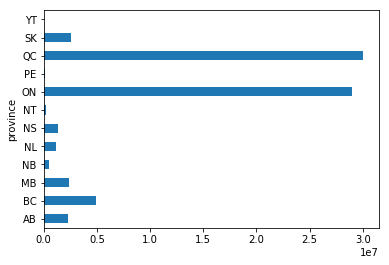

In [27]:
%matplotlib inline
subv[patrimoine][periodiques].groupby("province").valeur.sum().plot("barh")

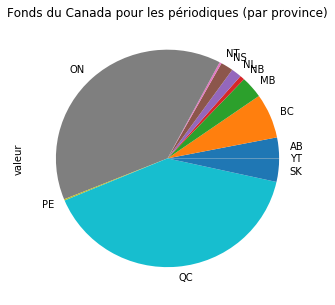

In [28]:
subv[patrimoine][periodiques].groupby("province").valeur.sum().plot(kind="pie", figsize=[5,5], title="Fonds du Canada pour les périodiques (par province)")

Mais pandas n'est pas vraiment fait pour visualiser des données.<br>
D'autres bibliothèques comme [```matplotlib```](https://matplotlib.org/), [```seaborn```](https://seaborn.pydata.org/) ou [```bokeh```](https://bokeh.pydata.org/en/latest/), offrent beaucoup plus d'options.